In [0]:
import numpy as np 
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math

Mnist database contains images of thousands of handwritten digits, and their proper labels.

In [39]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The CNN model we designed is a simple network with 3 sets of convolution (pooling layers) followed by a fully connected softmax layer. We use the tensorflow.contrib.slim while implementing the network as we could easily define the layer variable.

In [0]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in")
keep_prob = tf.placeholder("float")

x_image = tf.reshape(x,[-1,28,28,1])
hidden_1 = slim.conv2d(x_image,5,[5,5])
pool_1 = slim.max_pool2d(hidden_1,[2,2])
hidden_2 = slim.conv2d(pool_1,5,[5,5])
pool_2 = slim.max_pool2d(hidden_2,[2,2])
hidden_3 = slim.conv2d(pool_2,20,[5,5])
hidden_3 = slim.dropout(hidden_3,keep_prob)
out_y = slim.fully_connected(slim.flatten(hidden_3),10,activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

We then train the network using batch (50) gradient descent with Adam optimization.

In [40]:
batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step, feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],true_y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))

step 100, training accuracy 0.14
step 200, training accuracy 0.64
step 300, training accuracy 0.8
step 400, training accuracy 0.7
step 500, training accuracy 0.82
step 600, training accuracy 0.9
step 700, training accuracy 0.86
step 800, training accuracy 0.92
step 900, training accuracy 0.88
step 1000, training accuracy 0.96


In [31]:
testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,true_y:svhn.test.labels, keep_prob:1.0})
print("test accuracy %g"%(testAccuracy))

test accuracy 0.8939


We define a couple functions that will allow us to visualize the network. The first gets the activations at a given layer for a given input image. The second plots those activations in a grid.


In [0]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)

In [0]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

Choose an image from the database to visualize.

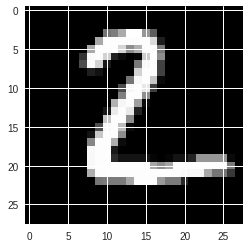

In [51]:
imageToUse = mnist.test.images[1]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

We can look at how that image activates the neurons of the first convolutional layer. We notice that each filter has learned differently to activate optimally for different features of the image. Also, as layer increases, the images which activate feature optimally will be less clear than previous layers'. 


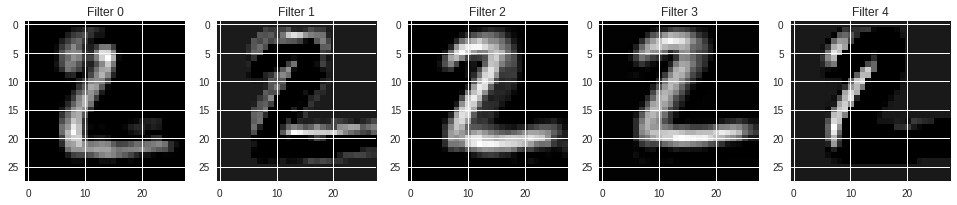

In [52]:
getActivations(hidden_1,imageToUse)


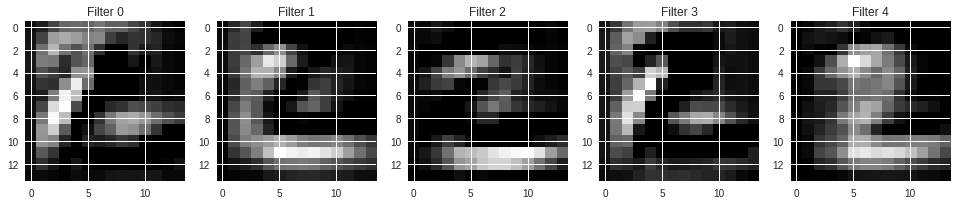

In [53]:
getActivations(hidden_2,imageToUse)


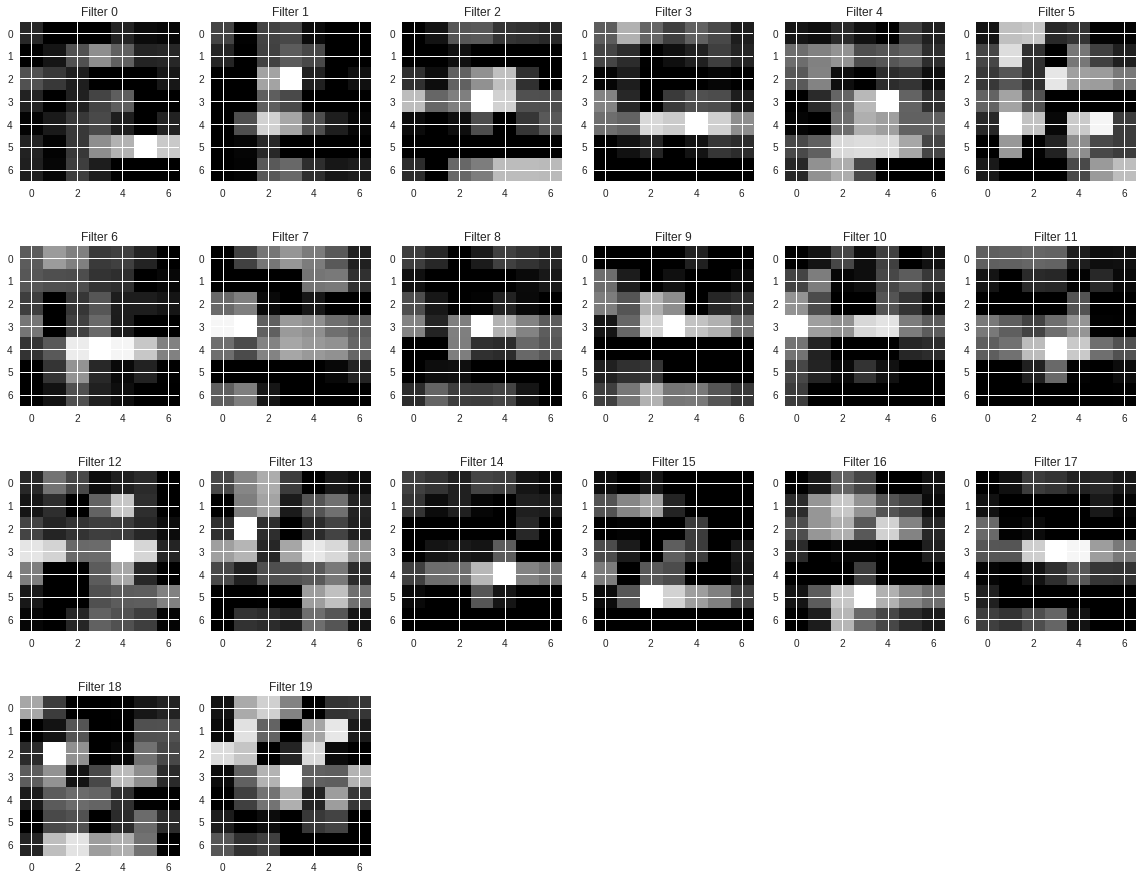

In [54]:
getActivations(hidden_3,imageToUse)


In [0]:
!pip install --quiet lucid==0.0.5

import numpy as np
import scipy.ndimage as nd
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [0]:
# Let's import a model from the Lucid modelzoo!

model = models.InceptionV1()
model.load_graphdef()

512 2491.6746



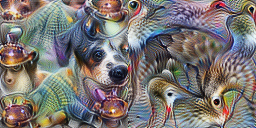

In [57]:
param_f = lambda: param.image(128, batch=2)
obj = objectives.channel("mixed4d_pre_relu", 479, batch=1) - objectives.channel("mixed4d_pre_relu", 479, batch=0)
_ = render.render_vis(model, obj, param_f)

512 2544.724



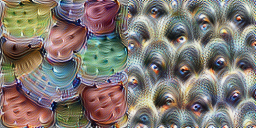

In [3]:
param_f = lambda: param.image(128, batch=2)
obj = objectives.channel("mixed4a_pre_relu", 240, batch=1) - objectives.channel("mixed4a_pre_relu", 240, batch=0)
_ = render.render_vis(model, obj, param_f)